In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
diabet = load_diabetes()
print(len(diabet.feature_names))
x = diabet.data
y = diabet.target
x.shape

10


(442, 10)

# StandardScaler

In [46]:
data = np.c_[x,y]
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)
print(data_scaled.shape)
x_scal = data_scaled[:,:10]
y_scal = data_scaled[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)
x_train_scal, x_test_scal, y_train_scal, y_test_scal = train_test_split(x_scal, y_scal, test_size = 0.25)


(442, 11)


# PCA & reduce dimension

In [3]:
pca = PCA()
pca.fit(x)
print(pca.explained_variance_ratio_)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum>0.95)+1
print(dim)

[0.40242142 0.14923182 0.12059623 0.09554764 0.06621856 0.06027192
 0.05365605 0.04336832 0.00783199 0.00085605]
8


# LinearRegression

In [113]:
lin_reg = LinearRegression()
#lin_reg.fit(x_train_scal, y_train_scal)
# y_pred_lin = lin_reg.predict(x_test_scal)
# mean_squared_error(y_test_scal, y_pred_lin)
scoring = cross_val_score(lin_reg, x_test_scal, y_test_scal,scoring = 'neg_mean_squared_error',cv = 10)
lin_reg_score = np.sqrt(-scoring)
lin_reg_score.mean()

0.7427024460771116

# Polynomial Regression

In [85]:
poly_features = PolynomialFeatures(degree = 2, include_bias= False)
x_train_poly = poly_features.fit_transform(x_train_scal)
#lin_reg.fit(x_train_poly,y_train_scal)

x_test_poly = poly_features.fit_transform(x_test_scal)
# y_pred_poly = lin_reg.predict(x_test_poly)
# mean_squared_error(y_pred_poly, y_test_scal)
scoring = cross_val_score(lin_reg, x_test_poly, y_test_scal,scoring = 'neg_mean_squared_error',cv = 10)
lin_reg_score = np.sqrt(-scoring)
lin_reg_score.mean()

1.4677771128560493

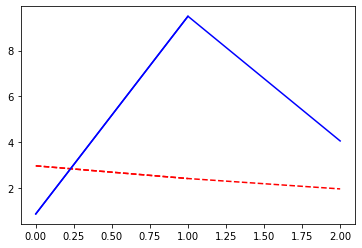

In [112]:
score_mean_train, score_mean_test =[], []
for i in range(2,5):
    poly_features = PolynomialFeatures(degree = i, include_bias= False)
    x_train_poly = poly_features.fit_transform(x_train_scal)
    #lin_reg.fit(x_train_poly,y_train_scal)
    scoring_train = cross_val_score(lin_reg, x_train_poly, y_train_scal,scoring = 'neg_mean_squared_error',cv = 3)
    lin_reg_score_train = np.sqrt(-scoring_train)
    score_mean_train.append(lin_reg_score_train.mean())

    x_test_poly = poly_features.fit_transform(x_test_scal)
    scoring_test = cross_val_score(lin_reg, x_test_poly, y_test_scal,scoring = 'neg_mean_squared_error',cv = 3)
    lin_reg_score_test = np.sqrt(-scoring_test)
    score_mean_test.append(lin_reg_score_test.mean())
    plt.plot(score_mean_test,'r--')
    plt.plot(score_mean_train, 'b')

# DecisionTreeRegressor

In [111]:
tree_reg = DecisionTreeRegressor(max_depth= 3)
#tree_reg.fit(x_train_scal, y_train_scal)
# y_pred_tree = tree_reg.predict(x_test_scal)
# mean_squared_error(y_test_scal, y_pred_tree)
scoring = cross_val_score(tree_reg, x_test_scal, y_test_scal,scoring = 'neg_mean_squared_error',cv = 10)
tree_reg_score = np.sqrt(-scoring)
tree_reg_score.mean()

0.8978972574635108

# RandomForestRegressor

In [81]:
rdfrst_reg = RandomForestRegressor(max_depth=3, random_state= 1234)
#rdfrst_reg.fit(x_train_scal, y_train_scal)
# y_pred_tree = rdfrst_reg.predict(x_test_scal)
# mean_squared_error(y_test_scal, y_pred_tree)
scoring = cross_val_score(rdfrst_reg, x_test_scal, y_test_scal,scoring = 'neg_mean_squared_error',cv = 10)
rdfrst_score = np.sqrt(-scoring)
rdfrst_score.mean()

0.7554313510515095

# SVR

In [108]:
svr_reg = SVR(kernel = 'linear')
#svr_reg.fit(x_train_scal, y_train_scal)
# y_pred_svr = cross_val_predict(svr_reg, x_test_scal, y_test_scal, cv = 10)
# y_pred_svr = svr_reg.predict(x_test_scal)
# mean_squared_error(y_test_scal, y_pred_tree)
scoring = cross_val_score(svr_reg, x_test_scal, y_test_scal,scoring = 'neg_mean_squared_error',cv = 10)
svr_score = np.sqrt(-scoring)
svr_score.mean()

0.7697001613733457

# SGDRegressor

In [109]:
sgd_reg_l1 = SGDRegressor(penalty= 'l1')
#sgd_reg_l1.fit(x_train_scal, y_train_scal.ravel())
# y_pred_tree = rdfrst_reg.predict(x_test_scal)
# mean_squared_error(y_test_scal, y_pred_tree)
scoring = cross_val_score(sgd_reg_l1, x_test_scal, y_test_scal.ravel(),scoring = 'neg_mean_squared_error',cv = 10)
sgd_reg_l1_score = np.sqrt(-scoring)
sgd_reg_l1_score.mean()

0.742928812131732

In [110]:
sgd_reg_l2 = SGDRegressor(penalty= 'l2')
#sgd_reg_l2.fit(x_train_scal, y_train_scal.ravel())
# y_pred_tree = rdfrst_reg.predict(x_test_scal)
# mean_squared_error(y_test_scal, y_pred_tree)
scoring = cross_val_score(sgd_reg_l2, x_test_scal, y_test_scal.ravel(),scoring = 'neg_mean_squared_error',cv = 10)
sgd_reg_l2_score = np.sqrt(-scoring)
sgd_reg_l2_score.mean()

0.7444585211848688

# cross validation for all algorithms

minimum RMSE is: lin_reg


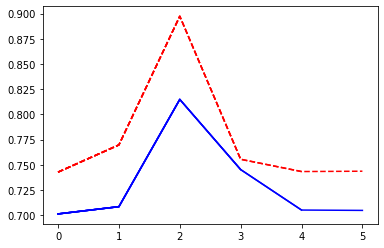

In [114]:
lst = ['lin_reg', 'svr_reg', 'tree_reg', 'rdfrst_reg','sgd_reg_l2','sgd_reg_l1']
score_train, score_test = [], []

for clf in (lin_reg, svr_reg, tree_reg, rdfrst_reg,sgd_reg_l2,sgd_reg_l1):
    #clf.fit(x_train_scal, y_train_scal)
    #y_pred = cross_val_predict(clf,x_test_scal, y_test_scal.ravel(), cv =5)
    
    scoring_train = cross_val_score(clf, x_train_scal, y_train_scal,cv = 10, scoring = 'neg_mean_squared_error')
    sqrt_score_train = np.sqrt(-scoring_train)
    score_train.append(sqrt_score_train.mean())
    
    
    scoring_test = cross_val_score(clf, x_test_scal, y_test_scal,cv = 10, scoring = 'neg_mean_squared_error')
    sqrt_score_test = np.sqrt(-scoring_test)
    score_test.append(sqrt_score_test.mean())
    plt.plot(score_test,'r--')
    plt.plot(score_train,'b')

print('minimum RMSE is:',lst[np.argmin(score_test)])

# GridSearchCV in Random Forest

In [135]:
#using different parameters:
param_grid = {'max_features': [2,4,6,8], 'n_estimators': [3,10,200,300,500],'bootstrap':[False, True]}
rnd_frst = RandomForestRegressor()
grid_search = GridSearchCV(rnd_frst, param_grid, cv =5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search.fit(x_train_scal, y_train_scal)

grid_search.best_estimator_
grid_search.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 300}

In [137]:
cv_result = grid_search.cv_results_
mean_scores, params = [],[]
for mean_score ,param in zip(cv_result['mean_test_score'], cv_result['params']):
    mean_scores.append(np.sqrt(-mean_score))
    params.append(param)
    print(mean_score, param)

print(np.argmin(mean_scores), params[np.argmin(mean_scores)])

-0.8372307592108239 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
-0.6421752728056395 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
-0.5662775750093549 {'bootstrap': False, 'max_features': 2, 'n_estimators': 200}
-0.5585579363570001 {'bootstrap': False, 'max_features': 2, 'n_estimators': 300}
-0.5631259746015804 {'bootstrap': False, 'max_features': 2, 'n_estimators': 500}
-0.7885819238480398 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
-0.6494136216187262 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
-0.6110607402533093 {'bootstrap': False, 'max_features': 4, 'n_estimators': 200}
-0.6124227379145718 {'bootstrap': False, 'max_features': 4, 'n_estimators': 300}
-0.6133189058247066 {'bootstrap': False, 'max_features': 4, 'n_estimators': 500}
-0.8173092514741054 {'bootstrap': False, 'max_features': 6, 'n_estimators': 3}
-0.7287056429820102 {'bootstrap': False, 'max_features': 6, 'n_estimators': 10}
-0.68347679860195 {'bootstrap': False